In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('C:/Users/yakul/mutipage/data/week.csv')



In [33]:
df

,Date,Sale
0,10-Jan-21,41000
1,17-Jan-21,35620
2,24-Jan-21,29000
3,31-Jan-21,42850
4,07-Feb-21,49500
...,...,...
58,27-Feb-22,30805
59,06-Mar-22,41925
60,13-Mar-22,43500
61,20-Mar-22,42660


In [34]:
df.shape


(63, 2)

In [35]:
df

,Date,Sale
0,10-Jan-21,41000
1,17-Jan-21,35620
2,24-Jan-21,29000
3,31-Jan-21,42850
4,07-Feb-21,49500
...,...,...
58,27-Feb-22,30805
59,06-Mar-22,41925
60,13-Mar-22,43500
61,20-Mar-22,42660


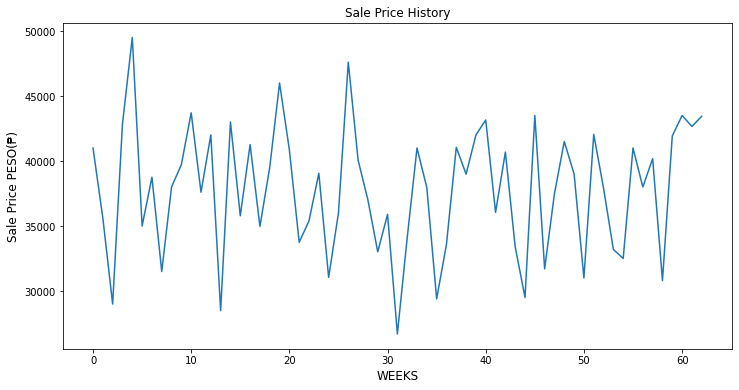

In [36]:
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(df['Sale'])
plt.xlabel('WEEKS', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.show()

In [37]:
ma4 = df.Sale.rolling(4).mean()
ma4

0          NaN
1          NaN
2          NaN
3     37117.50
4     39242.50
        ...   
58    37496.25
59    37727.50
60    39102.50
61    39722.50
62    42881.25
Name: Sale, Length: 63, dtype: float64

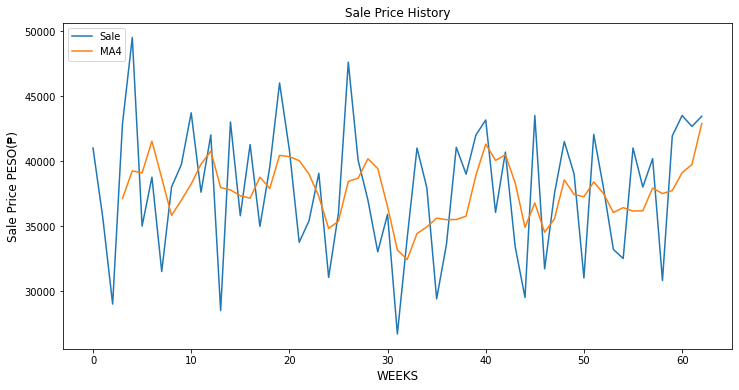

In [38]:
plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma4)
plt.title('Sale Price History')
plt.xlabel('WEEKS', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.legend(['Sale','MA4'], loc = 'upper left')

In [39]:
ma8 = df.Sale.rolling(8).mean()
ma8

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
58    36955.625
59    36940.000
60    37639.375
61    38821.875
62    40188.750
Name: Sale, Length: 63, dtype: float64

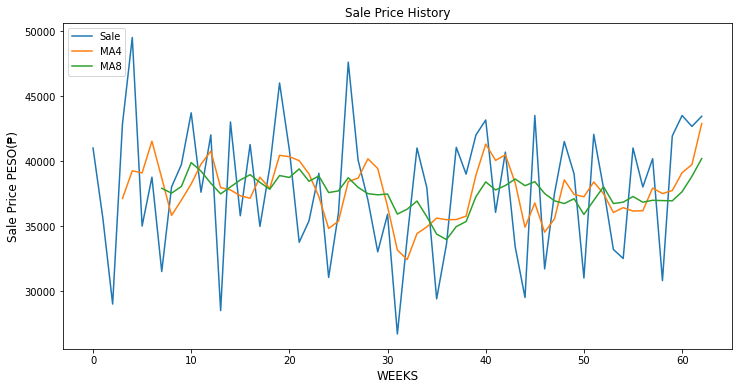

In [40]:
plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma4)
plt.plot(ma8)
plt.title('Sale Price History')
plt.xlabel('WEEKS', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.legend(['Sale','MA4','MA8'], loc = 'upper left')

In [41]:
data = df.filter(['Sale'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7)
training_data_len

45

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.62719298],
       [0.39122807],
       [0.10087719],
       [0.70833333],
       [1.        ],
       [0.36403509],
       [0.52872807],
       [0.21052632],
       [0.49561404],
       [0.57127193],
       [0.74583333],
       [0.47807018],
       [0.67149123],
       [0.07894737],
       [0.71491228],
       [0.39868421],
       [0.63881579],
       [0.3627193 ],
       [0.56184211],
       [0.84649123],
       [0.62083333],
       [0.30921053],
       [0.38157895],
       [0.54188596],
       [0.19078947],
       [0.40811404],
       [0.91666667],
       [0.58640351],
       [0.45175439],
       [0.27697368],
       [0.40350877],
       [0.        ],
       [0.32390351],
       [0.62719298],
       [0.49342105],
       [0.11842105],
       [0.30263158],
       [0.62938596],
       [0.53903509],
       [0.67105263],
       [0.72171053],
       [0.41008772],
       [0.61337719],
       [0.29385965],
       [0.12302632],
       [0.73684211],
       [0.21951754],
       [0.473

In [43]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(4, len(train_data)):
  x_train.append(train_data[i-4:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 4:
    print(x_train)
    print(y_train)
    print()

[array([0.62719298, 0.39122807, 0.10087719, 0.70833333])]
[1.0]



In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape

(41, 4)

In [46]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(41, 4, 1)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [48]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [49]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
41/41 [==============================] - 4s 9ms/step - loss: 0.0962
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0570
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0562
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0575
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0620
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0576
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0558
Epoch 8/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0542
Epoch 9/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 10/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0572
Epoch 11/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0580
Epoch 12/100
41/41 [==============================] - 0s 8ms/step - loss: 0.0552
Epoch 13/100
41/41 [=================

In [52]:
test_data = scaled_data[training_data_len -4: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(4, len(test_data)):
  x_test.append(test_data[i -4:i,0])

In [53]:
x_test = np.array(x_test)

In [54]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 819ms/step


In [56]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

727.5049913194445

C:\Users\yakul\AppData\Local\Temp\ipykernel_10308\2875159218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Predictions'] = predictions


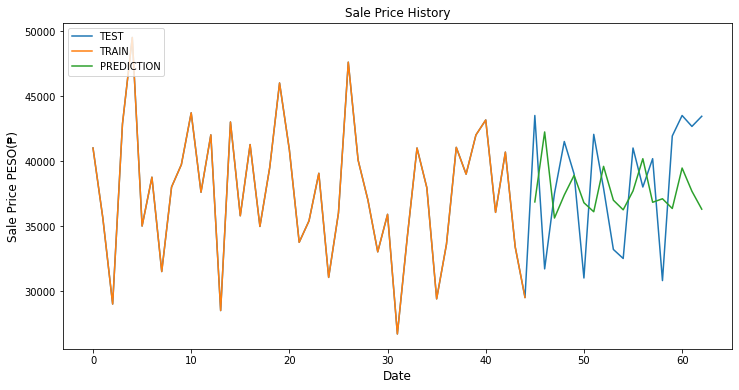

In [57]:
train = data[:training_data_len]
prediction = data[training_data_len:]
prediction['Predictions'] = predictions
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(data)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.plot(train['Sale'])
plt.plot(prediction[[ 'Predictions']])
plt.legend(['TEST','TRAIN','PREDICTION'], loc = 'upper left')
plt.show()


In [58]:
weeks = pd.read_csv('C:/Users/yakul/mutipage/data/week.csv')

newdf = weeks.filter(['Sale'])
last_4_weeks = newdf[-4:].values
last_4_weeks_scaled = scaler.transform(last_4_weeks)
X_test = [] 
X_test.append(last_4_weeks)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_sale = model.predict(X_test)
pred_sale = scaler.inverse_transform(pred_sale)
print(pred_sale)

1/1 [==============================] - 1s 739ms/step
[[32393.074]]
